In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:\CB\q2.csv')

In [6]:
df.columns

Index(['Trade id', 'Trade Date', 'Counterparty', 'Instrument',
       'Notinal Amount', 'Price', 'Settlement Amount', 'Trade Direction',
       'Execution Venue', 'Transaction Cost (% of price)'],
      dtype='object')

In [7]:
df = df.rename(columns={'Trade id':'TradeId', 'Trade Date':'TradeDate', 'Notinal Amount':'NotionalAmount', 
                        'Settlement Amount':'SettlementAmount', 'Trade Direction':'TradeDirection', 'Execution Venue':'ExecutionVenue', 'Transaction Cost (% of price)':'TransactionCost%ofPrice'})

In [43]:
#df = df.rename(columns={'Trade id':'TradeId', 'Trade Date':'TradeDate', 'Notinal Amount':'NominalAmount'})

In [8]:
df.columns

Index(['TradeId', 'TradeDate', 'Counterparty', 'Instrument', 'NotionalAmount',
       'Price', 'SettlementAmount', 'TradeDirection', 'ExecutionVenue',
       'TransactionCost%ofPrice'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of      TradeId   TradeDate Counterparty Instrument  NotionalAmount  Price  \
0      17011  2025-05-07        BRK 4     Google            1095    101   
1      11356  2025-08-31        BRK 3      Apple             581     99   
2      18878  2025-01-15        BRK 3  Microsoft            1429     98   
3      11939  2025-05-27        BRK 5      Tesla             991     96   
4      13886  2025-02-06        BRK 4     Nvidia            1215     99   
..       ...         ...          ...        ...             ...    ...   
197    18404  2025-04-08        BRK 1     Google             686     96   
198    17555  2025-07-29        BRK 5     Google            1910     98   
199    12646  2025-05-21        BRK 4     Google             497     96   
200    19611  2025-05-02        BRK 4     Google             855     97   
201    12982  2025-03-13        BRK 5     Google             289     98   

     SettlementAmount TradeDirection ExecutionVenue  TransactionCos

In [10]:
df.dtypes

TradeId                      int64
TradeDate                   object
Counterparty                object
Instrument                  object
NotionalAmount               int64
Price                        int64
SettlementAmount             int64
TradeDirection              object
ExecutionVenue              object
TransactionCost%ofPrice    float64
dtype: object

In [11]:
df['TradeDate'] = pd.to_datetime(df['TradeDate'])

In [13]:
df['Counterparty'] = df['Counterparty'].astype('string')
#print(df['Counterparty'].dtype)

In [14]:
df['Instrument'] = df['Instrument'].astype('string')

In [15]:
df['TradeDirection'] = df['TradeDirection'].astype('string')

In [16]:
df['ExecutionVenue'] = df['ExecutionVenue'].astype('string')

In [17]:
df.dtypes

TradeId                             int64
TradeDate                  datetime64[ns]
Counterparty               string[python]
Instrument                 string[python]
NotionalAmount                      int64
Price                               int64
SettlementAmount                    int64
TradeDirection             string[python]
ExecutionVenue             string[python]
TransactionCost%ofPrice           float64
dtype: object

In [18]:
df.shape

(202, 10)

In [19]:
df.isnull().sum()

TradeId                    0
TradeDate                  0
Counterparty               0
Instrument                 0
NotionalAmount             0
Price                      0
SettlementAmount           0
TradeDirection             0
ExecutionVenue             0
TransactionCost%ofPrice    0
dtype: int64

In [21]:
df.isnull().values.any()

False

In [22]:
df.loc[df.duplicated()]

,TradeId,TradeDate,Counterparty,Instrument,NotionalAmount,Price,SettlementAmount,TradeDirection,ExecutionVenue,TransactionCost%ofPrice


In [404]:
df.describe

<bound method NDFrame.describe of      TradeId  TradeDate Counterparty Instrument  NotionalAmount  Price  \
0      17011 2025-05-07        BRK 4     Google            1095    101   
1      11356 2025-08-31        BRK 3      Apple             581     99   
2      18878 2025-01-15        BRK 3  Microsoft            1429     98   
3      11939 2025-05-27        BRK 5      Tesla             991     96   
4      13886 2025-02-06        BRK 4     Nvidia            1215     99   
..       ...        ...          ...        ...             ...    ...   
197    18404 2025-04-08        BRK 1     Google             686     96   
198    17555 2025-07-29        BRK 5     Google            1910     98   
199    12646 2025-05-21        BRK 4     Google             497     96   
200    19611 2025-05-02        BRK 4     Google             855     97   
201    12982 2025-03-13        BRK 5     Google             289     98   

     SettlementAmount TradeDirection ExecutionVenue  TransactionCost%ofPrice 

In [28]:
top_Counterparties = (df.groupby('Counterparty')['NotionalAmount'].sum().sort_values(ascending=False))

In [29]:
top_Counterparties.head(3)

Counterparty
BRK 5    57081
BRK 4    56077
BRK 2    41175
Name: NotionalAmount, dtype: int64

In [27]:
top_Counterparties = top_Counterparties.reset_index()

In [30]:
top_Counterparties.head(3)

Counterparty
BRK 5    57081
BRK 4    56077
BRK 2    41175
Name: NotionalAmount, dtype: int64

In [33]:
top_Counterparties = top_Counterparties.head(3).reset_index()

In [60]:
print("Top Three counter Parties")
top_Counterparties

Top Three counter Parties


,Counterparty,NotionalAmount
0,BRK 5,57081
1,BRK 4,56077
2,BRK 2,41175


In [35]:
total_Notional = df['NotionalAmount'].sum()

In [36]:
total_Notional

225870

In [37]:
top_Notional_sum = top_Counterparties['NotionalAmount'].sum()

In [40]:
top_Notional_sum

154333

In [45]:
top_Percentage = (top_Notional_sum / total_Notional) * 100

In [61]:
top_Percentage

68.32824190906274

In [62]:
print("Percentage of Notional amount by Top Three Counterparties")
top_Percentage

Percentage of Notional amount by Top Three Counterparties


68.32824190906274

In [50]:
#avg_Transcost = (
#    df.groupby('TransactionCost%ofPrice')
df.dtypes

TradeId                             int64
TradeDate                  datetime64[ns]
Counterparty               string[python]
Instrument                 string[python]
NotionalAmount                      int64
Price                               int64
SettlementAmount                    int64
TradeDirection             string[python]
ExecutionVenue             string[python]
TransactionCost%ofPrice           float64
dtype: object

In [56]:
venue_Stats = df.groupby('ExecutionVenue')['TransactionCost%ofPrice'].agg(['mean','std','count']).reset_index().sort_values('mean')

In [57]:
venue_Stats.rename(columns={'mean':'avg_cost','std':'std_cost','count':'trades'}, inplace=True)

In [144]:
#venue_stats = df.groupby('ExecutionVenue')['TransactionCost%ofPrice'].mean().sort_values()
#.reset_index().sort_values('mean')

In [58]:
venue_Stats

,ExecutionVenue,avg_cost,std_cost,trades
0,Venue 1,0.368104,0.076923,63
1,Venue 2,0.373465,0.075712,59
2,Venue 3,0.388888,0.075424,80


In [59]:
venue_Stats.values

array([['Venue 1', 0.3681044724761905, 0.07692262262713144, 63],
       ['Venue 2', 0.3734650500677966, 0.07571237191596183, 59],
       ['Venue 3', 0.3888878542625, 0.07542447087699851, 80]],
      dtype=object)

In [65]:
counterparty_Stats = df.groupby('Counterparty')['TransactionCost%ofPrice'].agg(['mean','std','count']).reset_index().sort_values('mean')

In [66]:
counterparty_Stats.rename(columns={'mean':'avg_cost','std':'std_cost','count':'trades'}, inplace=True)

In [67]:
counterparty_Stats

,Counterparty,avg_cost,std_cost,trades
3,BRK 4,0.359458,0.076078,49
1,BRK 2,0.369356,0.077052,36
2,BRK 3,0.385203,0.079346,32
0,BRK 1,0.386259,0.074557,35
4,BRK 5,0.391605,0.073263,50


In [70]:
SettlBuckts = df['SettlementAmount'].quantile([0,0.25,0.5,0.75,1.0])

In [71]:
SettlBuckts

0.00     20855.0
0.25     75682.5
0.50    110337.5
0.75    151388.5
1.00    198566.0
Name: SettlementAmount, dtype: float64

In [68]:
sttlData = df['SettlementAmount'].agg(['min','max','mean'])

In [69]:
sttlData

min      20855.000000
max     198566.000000
mean    110208.361386
Name: SettlementAmount, dtype: float64

In [461]:
SettlBuckts.dtypes

dtype('float64')

In [73]:
SettlBuckts.values

array([ 20855. ,  75682.5, 110337.5, 151388.5, 198566. ])

In [74]:
sbins = np.concatenate(([0], SettlBuckts))

In [75]:
sbins

array([     0. ,  20855. ,  75682.5, 110337.5, 151388.5, 198566. ])

In [76]:
bins = np.unique(np.concatenate(([0], SettlBuckts)))

In [77]:
bins

array([     0. ,  20855. ,  75682.5, 110337.5, 151388.5, 198566. ])

In [78]:
print(len(bins))

6


In [79]:
labels = ['Bucket 1','Bucket 2','Bucket 3','Bucket 4','Bucket 5'][:len(bins)-1]

In [80]:
df['SettlementBucket'] = pd.cut(df['SettlementAmount'], bins=bins, labels=labels, include_lowest=True)

In [81]:
df['SettlementBucket']

0      Bucket 4
1      Bucket 2
2      Bucket 4
3      Bucket 3
4      Bucket 4
         ...   
197    Bucket 2
198    Bucket 5
199    Bucket 2
200    Bucket 3
201    Bucket 2
Name: SettlementBucket, Length: 202, dtype: category
Categories (5, object): ['Bucket 1' < 'Bucket 2' < 'Bucket 3' < 'Bucket 4' < 'Bucket 5']

In [82]:
bucket_insights = []
for bucket in df['SettlementBucket'].cat.categories:
    sub = df[df['SettlementBucket']==bucket]
    if sub.empty:
        continue
    best_venue = sub.groupby('ExecutionVenue')['TransactionCost%ofPrice'].mean().sort_values().head(1)
    best_counterparty = sub.groupby('Counterparty')['TransactionCost%ofPrice'].mean().sort_values().head(1)
    bucket_insights.append({
        'SettlementBucket': bucket,
        'n_trades': len(sub),
        'best_venue': best_venue.index[0],
        'best_venue_avg_cost': best_venue.iloc[0],
        'best_counterparty': best_counterparty.index[0],
        'best_counterparty_avg_cost': best_counterparty.iloc[0]
    })
bucket_insights_df = pd.DataFrame(bucket_insights)


In [83]:
bucket_insights_df

,SettlementBucket,n_trades,best_venue,best_venue_avg_cost,best_counterparty,best_counterparty_avg_cost
0,Bucket 1,1,Venue 3,0.357639,BRK 4,0.357639
1,Bucket 2,50,Venue 2,0.389137,BRK 1,0.384145
2,Bucket 3,50,Venue 2,0.363385,BRK 4,0.336074
3,Bucket 4,50,Venue 1,0.360823,BRK 2,0.343869
4,Bucket 5,51,Venue 1,0.357344,BRK 4,0.342395


In [84]:
df['MonthlyTrade'] = df['TradeDate'].dt.month

In [85]:
df

,TradeId,TradeDate,Counterparty,Instrument,NotionalAmount,Price,SettlementAmount,TradeDirection,ExecutionVenue,TransactionCost%ofPrice,SettlementBucket,MonthlyTrade
0,17011,2025-05-07,BRK 4,Google,1095,101,110595,BUY,Venue 1,0.333497,Bucket 4,5
1,11356,2025-08-31,BRK 3,Apple,581,99,57519,SELL,Venue 3,0.462467,Bucket 2,8
2,18878,2025-01-15,BRK 3,Microsoft,1429,98,140042,SELL,Venue 2,0.436245,Bucket 4,1
3,11939,2025-05-27,BRK 5,Tesla,991,96,95136,SELL,Venue 3,0.373437,Bucket 3,5
4,13886,2025-02-06,BRK 4,Nvidia,1215,99,120285,SELL,Venue 2,0.466305,Bucket 4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
197,18404,2025-04-08,BRK 1,Google,686,96,65856,BUY,Venue 2,0.301569,Bucket 2,4
198,17555,2025-07-29,BRK 5,Google,1910,98,187180,BUY,Venue 3,0.284344,Bucket 5,7
199,12646,2025-05-21,BRK 4,Google,497,96,47712,BUY,Venue 2,0.471615,Bucket 2,5
200,19611,2025-05-02,BRK 4,Google,855,97,82935,BUY,Venue 1,0.348248,Bucket 3,5


In [511]:
monthly_Stats = df.groupby('MonthlyTrade')['TransactionCost%ofPrice'].agg(['mean','count']).reset_index().sort_values('MonthlyTrade')

In [512]:
monthly_Stats

,MonthlyTrade,mean,count
0,1,0.406334,15
1,2,0.377857,18
2,3,0.353521,24
3,4,0.382298,23
4,5,0.389149,30
5,6,0.390437,15
6,7,0.374922,30
7,8,0.382581,24
8,9,0.356593,23


In [513]:
monthly_Stats.rename(columns={'mean':'avg_cost','count':'trades'}, inplace=True)

In [514]:
monthly_stats

,MonthlyTrade,avg_cost,trades
0,1,0.406334,15
1,2,0.377857,18
2,3,0.353521,24
3,4,0.382298,23
4,5,0.389149,30
5,6,0.390437,15
6,7,0.374922,30
7,8,0.382581,24
8,9,0.356593,23


In [488]:
top_Venues = venue_stats.head(3)['ExecutionVenue'].tolist()

In [490]:
top_Counterparties = counterparty_stats.head(3)['Counterparty'].tolist()

In [491]:
top_venues

['Venue 1', 'Venue 2', 'Venue 3']

In [492]:
top_counterparties

['BRK 4', 'BRK 2', 'BRK 3']

In [495]:
monthwise_top_venues = df[df['ExecutionVenue'].isin(top_venues)].groupby(['MonthlyTrade','ExecutionVenue'])['TransactionCost%ofPrice'].mean().reset_index()


In [496]:
monthwise_top_venues

,MonthlyTrade,ExecutionVenue,TransactionCost%ofPrice
0,1,Venue 1,0.401112
1,1,Venue 2,0.415122
2,1,Venue 3,0.404296
3,2,Venue 1,0.348955
4,2,Venue 2,0.466305
5,2,Venue 3,0.393720
6,3,Venue 1,0.342069
7,3,Venue 2,0.348559
8,3,Venue 3,0.366839
9,4,Venue 1,0.355185


In [497]:
monthwise_top_counterparties = df[df['Counterparty'].isin(top_counterparties)].groupby(['MonthlyTrade','Counterparty'])['TransactionCost%ofPrice'].mean().reset_index()

In [498]:
monthwise_top_counterparties

,MonthlyTrade,Counterparty,TransactionCost%ofPrice
0,1,BRK 2,0.414806
1,1,BRK 3,0.414804
2,2,BRK 2,0.373822
3,2,BRK 3,0.343700
4,2,BRK 4,0.380686
5,3,BRK 2,0.311855
6,3,BRK 3,0.322246
7,3,BRK 4,0.326968
8,4,BRK 2,0.378799
9,4,BRK 3,0.355879


In [499]:
pivot_cv = df.pivot_table(values='TransactionCost%ofPrice', index='Counterparty', columns='ExecutionVenue', aggfunc='mean')

In [501]:
pivot_cv

ExecutionVenue,Venue 1,Venue 2,Venue 3
Counterparty,,,
BRK 1,0.344560,0.373395,0.420711
BRK 2,0.374688,0.376993,0.352725
BRK 3,0.374017,0.382104,0.397108
BRK 4,0.320907,0.349021,0.395174
BRK 5,0.407762,0.405420,0.374979


In [517]:
dfinstr = df[['TradeDate', 'Instrument', 'NotionalAmount']]


In [518]:
dfinstr

,TradeDate,Instrument,NotionalAmount
0,2025-05-07,Google,1095
1,2025-08-31,Apple,581
2,2025-01-15,Microsoft,1429
3,2025-05-27,Tesla,991
4,2025-02-06,Nvidia,1215
...,...,...,...
197,2025-04-08,Google,686
198,2025-07-29,Google,1910
199,2025-05-21,Google,497
200,2025-05-02,Google,855


In [520]:
most_freq_Instrument = df['Instrument'].value_counts().idxmax()
#.sort_values().head(1)

In [521]:
most_freq_Instrument

'Microsoft'

In [269]:
most_freq_count = df['Instrument'].value_counts().max()

In [522]:
most_freq_count

46

In [523]:
df_most_freq = df[df['Instrument'] == most_freq_instrt].copy()

In [524]:
df_most_freq.head()

,TradeId,TradeDate,Counterparty,Instrument,NotionalAmount,Price,SettlementAmount,TradeDirection,ExecutionVenue,TransactionCost%ofPrice,SettlementBucket,MonthlyTrade
2,18878,2025-01-15,BRK 3,Microsoft,1429,98,140042,SELL,Venue 2,0.436245,Bucket 4,1
7,17586,2025-05-18,BRK 1,Microsoft,299,96,28704,BUY,Venue 3,0.302660,Bucket 2,5
12,12047,2025-07-17,BRK 4,Microsoft,1849,100,184900,SELL,Venue 2,0.416648,Bucket 5,7
17,10169,2025-07-03,BRK 2,Microsoft,1799,101,181699,BUY,Venue 1,0.286633,Bucket 5,7
22,19789,2025-02-08,BRK 4,Microsoft,837,100,83700,BUY,Venue 3,0.490115,Bucket 3,2


In [312]:
from datetime import datetime

In [314]:
df.columns

Index(['TradeId', 'TradeDate', 'Counterparty', 'Instrument', 'NominalAmount',
       'Price', 'SettlementAmount', 'TradeDirection', 'ExecutionVenue',
       'TransactionCost%ofPrice', 'SettlementBucket', 'MonthlyTrade'],
      dtype='object')

In [374]:
#df_most_freq_month = df_most_freq['TradeDate'].dt.to_period('M').dt.to_timestamp()

In [525]:
df_most_freq['Month'] = df_most_freq['TradeDate'].dt.to_period('M').dt.to_timestamp()
#df_most_freq['TradeDate']
#pd.to_datetime(df_most_freq['TradeDate']).dt.month
#df_most_freq_month

In [526]:
#df_most_freq['Month'] = pd.to_datetime(df_most_freq['TradeDate']).dt.month
df_most_freq

,TradeId,TradeDate,Counterparty,Instrument,NotionalAmount,Price,SettlementAmount,TradeDirection,ExecutionVenue,TransactionCost%ofPrice,SettlementBucket,MonthlyTrade,Month
2,18878,2025-01-15,BRK 3,Microsoft,1429,98,140042,SELL,Venue 2,0.436245,Bucket 4,1,2025-01-01
7,17586,2025-05-18,BRK 1,Microsoft,299,96,28704,BUY,Venue 3,0.302660,Bucket 2,5,2025-05-01
12,12047,2025-07-17,BRK 4,Microsoft,1849,100,184900,SELL,Venue 2,0.416648,Bucket 5,7,2025-07-01
17,10169,2025-07-03,BRK 2,Microsoft,1799,101,181699,BUY,Venue 1,0.286633,Bucket 5,7,2025-07-01
22,19789,2025-02-08,BRK 4,Microsoft,837,100,83700,BUY,Venue 3,0.490115,Bucket 3,2,2025-02-01
27,18150,2025-03-08,BRK 3,Microsoft,389,96,37344,BUY,Venue 2,0.286973,Bucket 2,3,2025-03-01
32,14367,2025-01-24,BRK 2,Microsoft,570,98,55860,BUY,Venue 1,0.456928,Bucket 2,1,2025-01-01
41,13348,2025-08-18,BRK 2,Microsoft,863,101,87163,SELL,Venue 1,0.494653,Bucket 3,8,2025-08-01
42,18065,2025-06-06,BRK 1,Microsoft,1045,98,102410,SELL,Venue 2,0.272026,Bucket 3,6,2025-06-01
43,13080,2025-09-16,BRK 2,Microsoft,1606,100,160600,BUY,Venue 2,0.325310,Bucket 5,9,2025-09-01


In [527]:
monthly_volume = df_most_freq.groupby('Month')['NotionalAmount'].sum().reset_index()

In [528]:
monthly_volume

,Month,NotionalAmount
0,2025-01-01,3803
1,2025-02-01,3800
2,2025-03-01,7556
3,2025-04-01,8170
4,2025-05-01,1942
5,2025-06-01,3066
6,2025-07-01,7871
7,2025-08-01,6664
8,2025-09-01,5992


In [530]:
monthly_volume['NotionalAmount'].sum()

48864

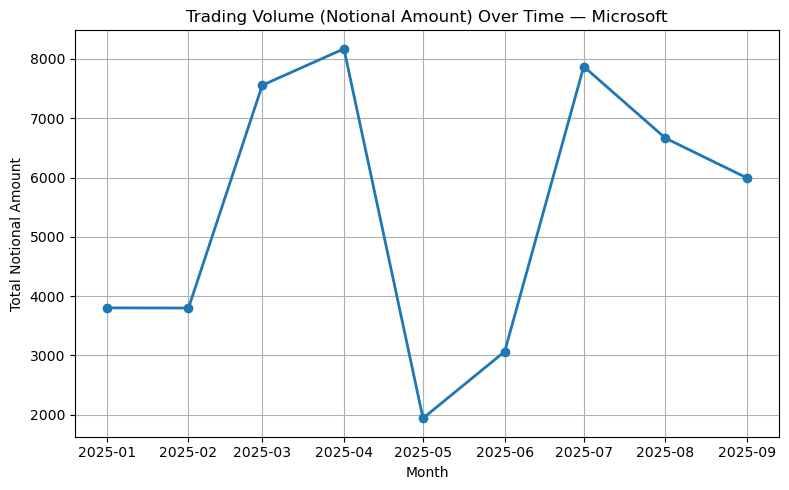

In [531]:
plt.figure(figsize=(8,5))
plt.plot(monthly_volume['Month'], monthly_volume['NotionalAmount'], marker='o', linewidth=2)
plt.title(f"Trading Volume (Notional Amount) Over Time — {most_freq_instrt}")
plt.xlabel("Month")
plt.ylabel("Total Notional Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

In [381]:
df

,TradeId,TradeDate,Counterparty,Instrument,NominalAmount,Price,SettlementAmount,TradeDirection,ExecutionVenue,TransactionCost%ofPrice,SettlementBucket,MonthlyTrade
0,17011,2025-05-07,BRK 4,Google,1095,101,110595,BUY,Venue 1,0.333497,Bucket 4,5
1,11356,2025-08-31,BRK 3,Apple,581,99,57519,SELL,Venue 3,0.462467,Bucket 2,8
2,18878,2025-01-15,BRK 3,Microsoft,1429,98,140042,SELL,Venue 2,0.436245,Bucket 4,1
3,11939,2025-05-27,BRK 5,Tesla,991,96,95136,SELL,Venue 3,0.373437,Bucket 3,5
4,13886,2025-02-06,BRK 4,Nvidia,1215,99,120285,SELL,Venue 2,0.466305,Bucket 4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
197,18404,2025-04-08,BRK 1,Google,686,96,65856,BUY,Venue 2,0.301569,Bucket 2,4
198,17555,2025-07-29,BRK 5,Google,1910,98,187180,BUY,Venue 3,0.284344,Bucket 5,7
199,12646,2025-05-21,BRK 4,Google,497,96,47712,BUY,Venue 2,0.471615,Bucket 2,5
200,19611,2025-05-02,BRK 4,Google,855,97,82935,BUY,Venue 1,0.348248,Bucket 3,5


In [535]:
total_Notional = df['NotionalAmount'].sum()

In [537]:
total_Notional

225870

In [540]:
df['Month'] = df['TradeDate'].dt.to_period('M').dt.to_timestamp()

In [542]:
df

,TradeId,TradeDate,Counterparty,Instrument,NotionalAmount,Price,SettlementAmount,TradeDirection,ExecutionVenue,TransactionCost%ofPrice,SettlementBucket,MonthlyTrade,Month
0,17011,2025-05-07,BRK 4,Google,1095,101,110595,BUY,Venue 1,0.333497,Bucket 4,5,2025-05-01
1,11356,2025-08-31,BRK 3,Apple,581,99,57519,SELL,Venue 3,0.462467,Bucket 2,8,2025-08-01
2,18878,2025-01-15,BRK 3,Microsoft,1429,98,140042,SELL,Venue 2,0.436245,Bucket 4,1,2025-01-01
3,11939,2025-05-27,BRK 5,Tesla,991,96,95136,SELL,Venue 3,0.373437,Bucket 3,5,2025-05-01
4,13886,2025-02-06,BRK 4,Nvidia,1215,99,120285,SELL,Venue 2,0.466305,Bucket 4,2,2025-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,18404,2025-04-08,BRK 1,Google,686,96,65856,BUY,Venue 2,0.301569,Bucket 2,4,2025-04-01
198,17555,2025-07-29,BRK 5,Google,1910,98,187180,BUY,Venue 3,0.284344,Bucket 5,7,2025-07-01
199,12646,2025-05-21,BRK 4,Google,497,96,47712,BUY,Venue 2,0.471615,Bucket 2,5,2025-05-01
200,19611,2025-05-02,BRK 4,Google,855,97,82935,BUY,Venue 1,0.348248,Bucket 3,5,2025-05-01


In [545]:
monthly_avg_value = df.groupby('Month')['SettlementAmount'].mean()

In [546]:
monthly_avg_value

Month
2025-01-01     93458.866667
2025-02-01    106323.555556
2025-03-01    120675.958333
2025-04-01    119082.869565
2025-05-01    104100.966667
2025-06-01     87626.666667
2025-07-01    117015.700000
2025-08-01    105744.875000
2025-09-01    122846.782609
Name: SettlementAmount, dtype: float64

In [548]:
avg_portfolio_value = monthly_avg_value.mean()

In [550]:
avg_portfolio_value

108541.80456253357

In [551]:
avg_portfolio_value = monthly_avg_value.mean()

In [556]:
cumulative_turnover = total_Notional / avg_portfolio_value

In [557]:
cumulative_turnover

2.0809493716300875

In [558]:
n_Months = df['Month'].nunique()

In [561]:
annualized_turnover = cumulative_turnover * (12 / n_Months) if n_Months > 0 else None

In [562]:
annualized_turnover

2.77459916217345